<a href="https://colab.research.google.com/github/Rohaannnn/Gold-Price-prediction/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

*data collection and process*

In [6]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
gold_data.shape

(2290, 6)

Correlations

In [9]:
correlation= gold_data.corr()

constructing a heatmap

<AxesSubplot:>

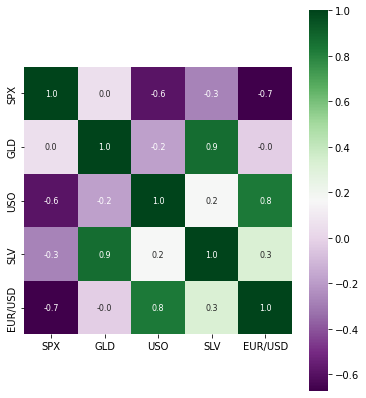

In [24]:
plt.figure(figsize=(6,7))
sns.heatmap(correlation, cbar=True, square=True, fmt= '.1f', annot=True ,annot_kws={'size':8}, cmap='PRGn' )

In [25]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

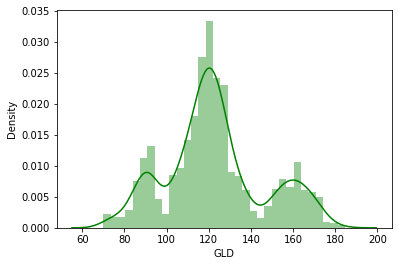

In [46]:
sns.distplot(gold_data['GLD'], color='green')

In [29]:
X= gold_data.drop(['Date', 'GLD'], axis=1)
Y= gold_data['GLD']

In [30]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [32]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting training and test data

In [34]:
X_train , X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)

Random forest Regressor

In [35]:
regressor= RandomForestRegressor(n_estimators=100)

In [38]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation 

In [39]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)

In [40]:
print(test_data_prediction)

[168.56799903  82.01699989 116.08369984 127.5479008  120.89120139
 154.76609757 149.86759871 125.99650014 117.46519872 125.94290105
 116.5619009  171.74400083 142.02119848 167.71619853 115.1770006
 117.73190035 138.79810302 170.11120051 159.16580256 159.22959964
 155.12279991 125.37420044 176.64719946 157.23610355 125.17240028
  93.68469961  78.40979983 120.79790008 119.11469937 167.50299971
  88.19690076 125.21389993  90.98760071 117.6197004  121.09969915
 136.13290057 115.47590105 115.33730104 148.95369963 106.92800146
 104.41050237  87.2061977  126.54280084 117.73339984 152.94489866
 119.84919969 108.4036005  107.96319819  93.2093004  126.95559802
  74.9748001  113.73189925 121.02659995 111.32199921 118.7670987
 121.11079966 159.19589976 166.72240123 146.81009657  85.73909853
  94.39360026  86.69979842  90.49739981 119.12610085 126.44610085
 127.49980006 169.17510002 122.27959968 117.65519886  98.40450035
 168.64860058 142.81699745 131.63100156 121.17350243 121.1764994
 119.81520046

In [44]:
error_score=metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.9893947410407166


In [49]:
Y_test = list(Y_test)

compare actual and predicted values

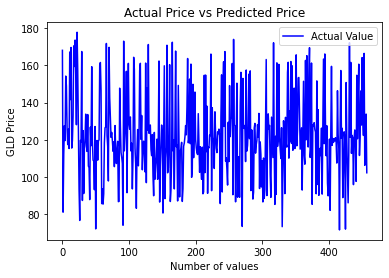

In [51]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
#plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()